In [8]:
import sys
sys.path.append("../")

import pandas as pd
import os
import statsmodels.formula.api as sm
import numpy as np


import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn-darkgrid')

from library import regulations
from library import analysis
from library import tables


In [9]:
data_path = '/Users/kylieleblancKylie/domino/dofis/data/'
table_path = '/Users/kylieleblancKylie/domino/dofis/results/descriptive/'
data = pd.read_csv(os.path.join(data_path, 'clean', 'master_data_district.csv'),
                  sep=",")
data = data[data.year == 2015]
data = data[data.doi == True]

/Users/kylieleblancKylie/anaconda/envs/spacy/lib/python3.7/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [11]:
data.students_hisp.hist

<bound method hist_series of 3682    0.064125
3683    0.088743
3684    0.103362
3685    0.110811
3686    0.391110
          ...   
4895    0.304731
4896    0.100000
4897    0.365517
4898    0.989937
4900    0.939959
Name: students_hisp, Length: 822, dtype: float64>

In [10]:
reg_stars = {}
for reg in regulations.mainless:
    reg_stars[reg] = reg
    
df = analysis.many_y_one_x(data, y_list = regulations.mainless, y_labels = reg_stars, x = 'students_hisp')
df['stars'] = np.where(df['P-value'] > .05, '', 
                  np.where((df['P-value'] <= .05) & (df['P-value'] > .01), '*', 
                      np.where((df['P-value'] <= .01) & (df['P-value'] > .001), '**', 
                          np.where((df['P-value'] <= .001), '***',''))))
for reg in df.Characteristic:
    reg_stars[reg] = df[df.Characteristic == reg]['stars'].values[0]
reg_stars
df

reg25_0811 ~ + 1 + students_hisp
                            OLS Regression Results                            
Dep. Variable:             reg25_0811   R-squared:                       0.009
Model:                            OLS   Adj. R-squared:                  0.008
Method:                 Least Squares   F-statistic:                     7.863
Date:                Tue, 15 Oct 2019   Prob (F-statistic):            0.00516
Time:                        07:51:33   Log-Likelihood:                 302.08
No. Observations:                 822   AIC:                            -600.2
Df Residuals:                     820   BIC:                            -590.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept    

                            OLS Regression Results                            
Dep. Variable:              reg21_352   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.001
Method:                 Least Squares   F-statistic:                    0.3357
Date:                Tue, 15 Oct 2019   Prob (F-statistic):              0.562
Time:                        07:51:33   Log-Likelihood:                -415.99
No. Observations:                 822   AIC:                             836.0
Df Residuals:                     820   BIC:                             845.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         0.2136      0.025      8.713

,Characteristic,Control,Difference,Std. Error,P-value,stars
0,reg25_0811,0.99,-0.07,0.02,0.01,**
1,reg25_081,0.42,0.03,0.07,0.71,
2,reg25_0812,0.27,0.04,0.06,0.58,
3,reg25_082,0.28,-0.08,0.06,0.17,
4,reg25_112,0.47,-0.08,0.07,0.24,
5,reg25_111,0.14,0.03,0.05,0.54,
6,reg21_003,0.90,-0.08,0.05,0.09,
7,reg21_102,0.61,-0.30,0.07,0.00,***
8,reg21_401,0.39,-0.11,0.07,0.11,
9,reg21_352,0.21,-0.03,0.06,0.56,


In [4]:
cols = []
for reg in regulations.mainless:
    cols.append(reg)
cols.append('students_hisp')
data['bins_hispanic']  = pd.qcut(data['students_hisp'], 5)
p_exempt = data.groupby(['bins_hispanic'])[cols].mean().round(2)
p_exempt = p_exempt.reset_index()
#p_exempt = p_exempt.iloc[[0,4]]
p_exempt

,bins_hispanic,reg25_0811,reg25_081,reg25_0812,reg25_082,reg25_112,reg25_111,reg21_003,reg21_102,reg21_401,reg21_352,reg21_354,reg25_092,reg37_0012,reg25_036,students_hisp
0,"(0.00467, 0.132]",0.97,0.34,0.27,0.22,0.48,0.13,0.88,0.59,0.36,0.20,0.04,0.13,0.13,0.26,0.09
1,"(0.132, 0.23]",0.99,0.48,0.29,0.29,0.44,0.13,0.84,0.59,0.41,0.23,0.07,0.23,0.22,0.26,0.18
2,"(0.23, 0.383]",0.98,0.43,0.24,0.29,0.42,0.16,0.89,0.48,0.34,0.21,0.07,0.33,0.26,0.20,0.30
3,"(0.383, 0.57]",0.98,0.51,0.29,0.24,0.45,0.20,0.91,0.48,0.35,0.17,0.04,0.29,0.24,0.21,0.47
4,"(0.57, 0.996]",0.93,0.41,0.31,0.23,0.42,0.15,0.82,0.41,0.30,0.20,0.07,0.33,0.24,0.15,0.76


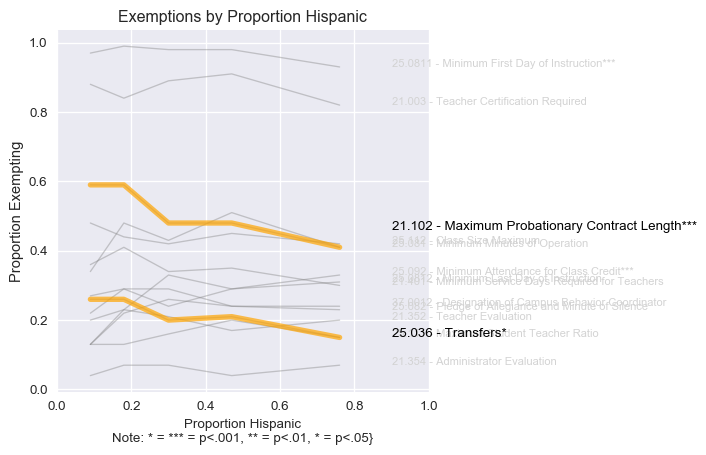

In [6]:
plt.style.use('seaborn')
my_dpi=96
plt.figure(figsize=(480/my_dpi, 480/my_dpi), dpi=my_dpi)


for column in p_exempt[regulations.mainless]:
   plt.plot(p_exempt['students_hisp'], p_exempt[column], marker='', color='grey', linewidth=1, alpha=0.4)

plt.xlim(0,1)

emphasize = ['reg21_102', 'reg25_036']

num=0
for i in range(len(regulations.mainless)):
   reg = regulations.mainless[num]
   if reg not in emphasize:
      plt.text(.9, p_exempt[reg][4] , regulations.labels[reg] + reg_stars[reg], horizontalalignment='left', size='small', color='lightgrey')
   num+=1

for reg in emphasize:
    plt.plot(p_exempt['students_hisp'], p_exempt[reg], marker='', color='orange', linewidth=4, alpha=0.7, label = 'label')
    if reg == 'reg21_102':
        plt.text(.9, p_exempt[reg][4] + .05, regulations.labels[reg] + reg_stars[reg], horizontalalignment='left', size='medium', color='black')
    else:
        plt.text(.9, p_exempt[reg][4], regulations.labels[reg] + reg_stars[reg], horizontalalignment='left', size='medium', color='black')

plt.ylabel('Proportion Exempting')
plt.title('Exemptions by Proportion Hispanic')
plt.xlabel('Proportion Hispanic\nNote: * = *** = p<.001, ** = p<.01, * = p<.05}', size = 'medium')

plt.savefig(table_path + 'spaghetti_geography_hispanic.png', bbox_inches="tight")

plt.show()


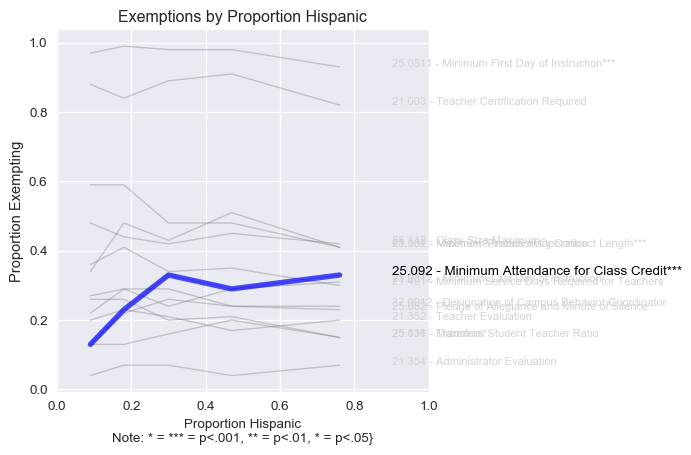

In [7]:
plt.style.use('seaborn')
my_dpi=96
plt.figure(figsize=(480/my_dpi, 480/my_dpi), dpi=my_dpi)


for column in p_exempt[regulations.mainless]:
   plt.plot(p_exempt['students_hisp'], p_exempt[column], marker='', color='grey', linewidth=1, alpha=0.4)

plt.xlim(0,1)

emphasize = ['reg25_092']

num=0
for i in range(len(regulations.mainless)):
   reg = regulations.mainless[num]
   if reg not in emphasize:
      plt.text(.9, p_exempt[reg][4] , regulations.labels[reg] + reg_stars[reg], horizontalalignment='left', size='small', color='lightgrey')
   num+=1

for reg in emphasize:
    plt.plot(p_exempt['students_hisp'], p_exempt[reg], marker='', color='blue', linewidth=4, alpha=0.7, label = 'label')
    if reg == 'reg21_102':
        plt.text(.9, p_exempt[reg][4] + .05, regulations.labels[reg] + reg_stars[reg], horizontalalignment='left', size='medium', color='black')
    else:
        plt.text(.9, p_exempt[reg][4], regulations.labels[reg] + reg_stars[reg], horizontalalignment='left', size='medium', color='black')

plt.ylabel('Proportion Exempting')
plt.title('Exemptions by Proportion Hispanic')
plt.xlabel('Proportion Hispanic\nNote: * = *** = p<.001, ** = p<.01, * = p<.05}', size = 'medium')

plt.savefig(table_path + 'spaghetti_geography_hispanic.png', bbox_inches="tight")

plt.show()